In [23]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Importing dataset
dataset = pd.read_csv('/Users/mithunkhatri/PycharmProjects/ml-handson/dataset/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
dataset['Genre'] = dataset['Genre'].map({'Male': 0, 'Female':1})

In [26]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


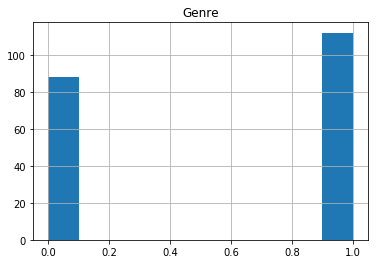

   index  Genre
0      1    112
1      0     88


In [27]:
dataset.hist(column='Genre')
plt.show()
print(dataset['Genre'].value_counts().reset_index())

In [33]:
# Annual Income vs score
X = dataset.iloc[:, [3,4]].values

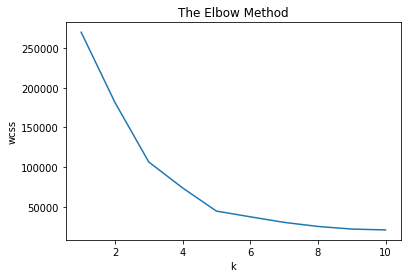

In [36]:
# Finding out optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

In [38]:
# Applying kmeans on dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

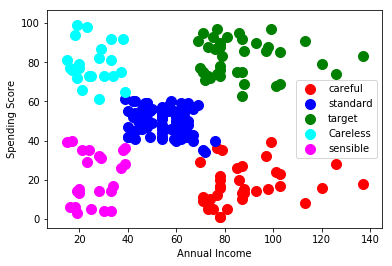

In [45]:
# Visualizing the clusters
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s = 100, c='red', label='careful')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s = 100, c='blue', label='standard')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s = 100, c='green', label='target')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s = 100, c='cyan', label='Careless')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s = 100, c='magenta', label='sensible')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
# Performing HC Clustering
